<a href="https://colab.research.google.com/github/TofayelAhmmedBabu/calories_burnt_prediction/blob/main/calories_burnt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*import libraries*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


*importing dataset*


In [ ]:
exercise = pd.read_csv('exercise.csv')
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [ ]:
calories = pd.read_csv('calories.csv')
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


Data Preprocessing

* Taking care of missing values

In [ ]:
exercise.isnull().values.any()

False

In [ ]:
calories.isnull().values.any()

False

In [ ]:
exercise.isnull().values.sum()

0

In [ ]:
calories.isnull().values.sum()

0

* combining dataset

In [ ]:
calories = pd.concat([exercise, calories['Calories']], axis = 1)


In [ ]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


* checking the number of rows and cols

In [ ]:
calories.shape

(15000, 9)

* getting some info about data


In [ ]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


* Data Analysis

In [ ]:
# get some staitscal measure about the data
calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


* data visualization

In [ ]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

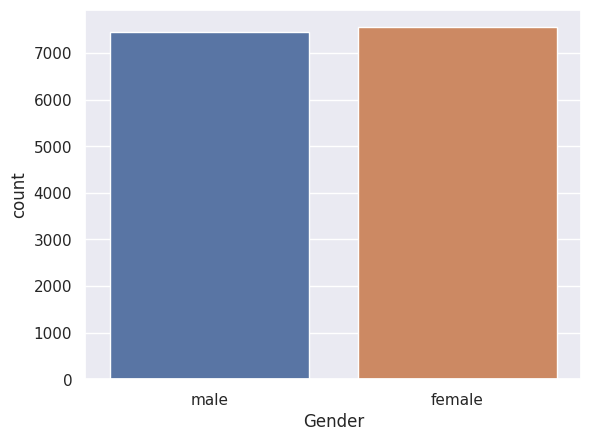

In [ ]:
# ploting the gender col in count plot
sns.countplot(data=calories, x='Gender')


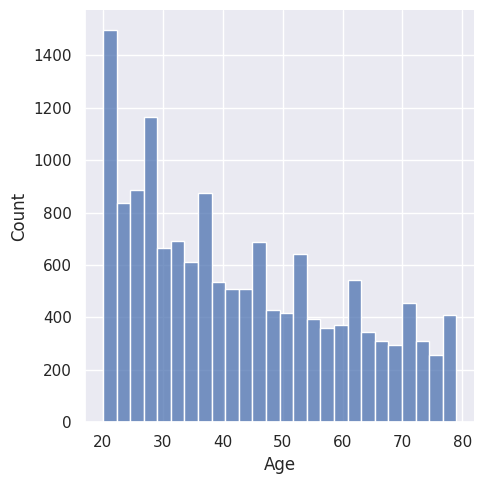

In [ ]:
# finding the distribution of 'Age' col
sns.displot(calories['Age'])

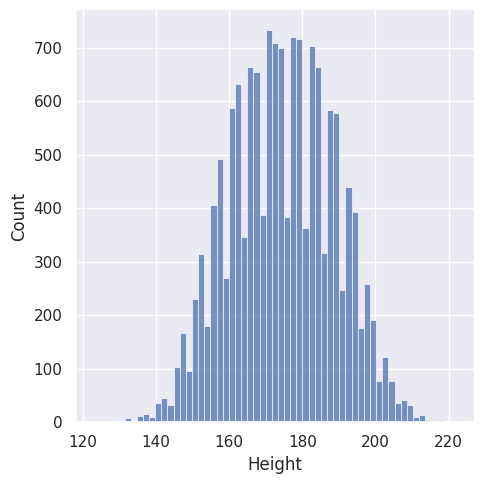

In [ ]:
# finding the distribution of 'Height' col
sns.displot(calories['Height'])

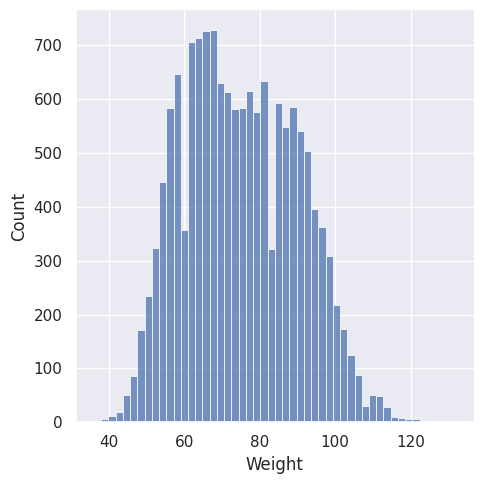

In [ ]:
# finding the distribution of 'weight' col
sns.displot(calories['Weight'])

* finding the correlation in the dataset
     * positve correlation
     * negative correlation


In [ ]:
correlation = calories.corr()

<ipython-input-32-5553a11e00c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories.corr()


<Axes: >

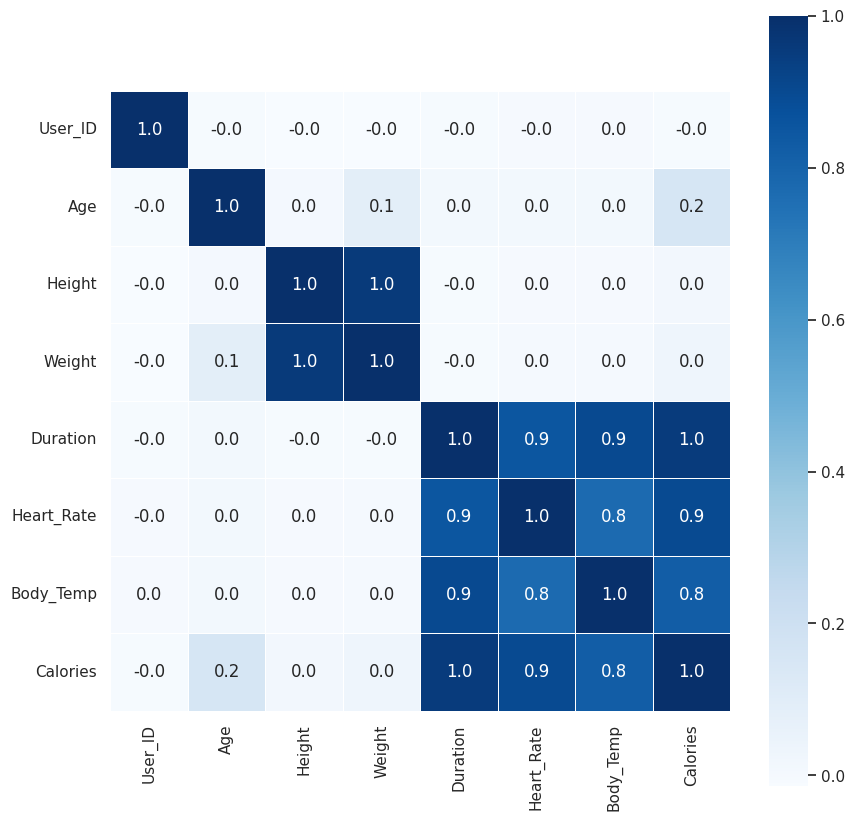

In [ ]:
# constructing heatmap to understand the correlation

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='Blues', square= True, fmt=".1f", linewidths=0.5)


* encoding categorical data

In [ ]:
calories.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)


In [ ]:
calories

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


* Features variables( Independent variables and Dependent Varibles)

In [ ]:
X = calories.iloc[:, :-1].values
X

array([[1.4733363e+07, 0.0000000e+00, 6.8000000e+01, ..., 2.9000000e+01,
        1.0500000e+02, 4.0800000e+01],
       [1.4861698e+07, 1.0000000e+00, 2.0000000e+01, ..., 1.4000000e+01,
        9.4000000e+01, 4.0300000e+01],
       [1.1179863e+07, 0.0000000e+00, 6.9000000e+01, ..., 5.0000000e+00,
        8.8000000e+01, 3.8700000e+01],
       ...,
       [1.7271188e+07, 1.0000000e+00, 4.3000000e+01, ..., 1.6000000e+01,
        9.0000000e+01, 4.0100000e+01],
       [1.8643037e+07, 0.0000000e+00, 7.8000000e+01, ..., 2.0000000e+00,
        8.4000000e+01, 3.8300000e+01],
       [1.1751526e+07, 0.0000000e+00, 6.3000000e+01, ..., 1.8000000e+01,
        9.2000000e+01, 4.0500000e+01]])

In [ ]:
Y = calories.iloc[:, 8:].values
Y

array([[231.],
       [ 66.],
       [ 26.],
       ...,
       [ 75.],
       [ 11.],
       [ 98.]])

* spliting the dataset into training data set and test data set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)


Model Training

* train the model using train data set

In [ ]:
# train the model using train data set
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

* predict the results for X_test

In [ ]:
# predict the results for X_test
y_pred = regressor.predict(X_test)
y_pred

array([ 41.22496  ,  14.294383 , 102.70401  , ...,  69.403275 ,
        57.822823 ,   7.7738023], dtype=float32)

In [ ]:
Y_test

array([[ 43.],
       [ 15.],
       [101.],
       ...,
       [ 68.],
       [ 59.],
       [  9.]])

accuracy measure

In [ ]:
mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Aboslute Error : {mae}")
print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)

Mean Aboslute Error : 1.3730451954205831
Mean Squared Error: 3.893374299738138
R-squared (R²): 0.9989893476178797


visualizing

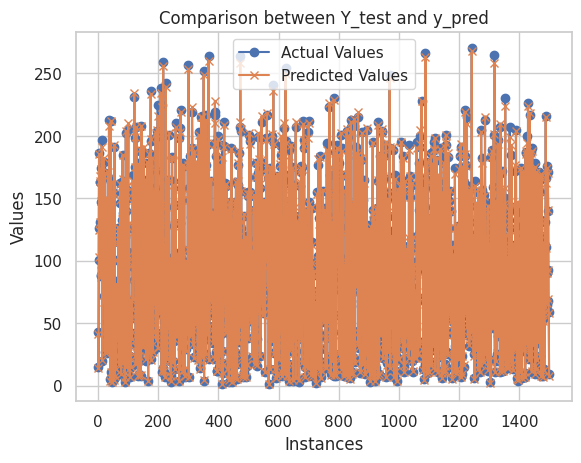

In [ ]:
indices = np.arange(len(Y_test))

plt.plot(indices, Y_test, label='Actual Values', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', marker='x')
plt.xlabel("Instances")
plt.ylabel("Values")
plt.title("Comparison between Y_test and y_pred")
plt.legend()
plt.show()

*You can Skip This*

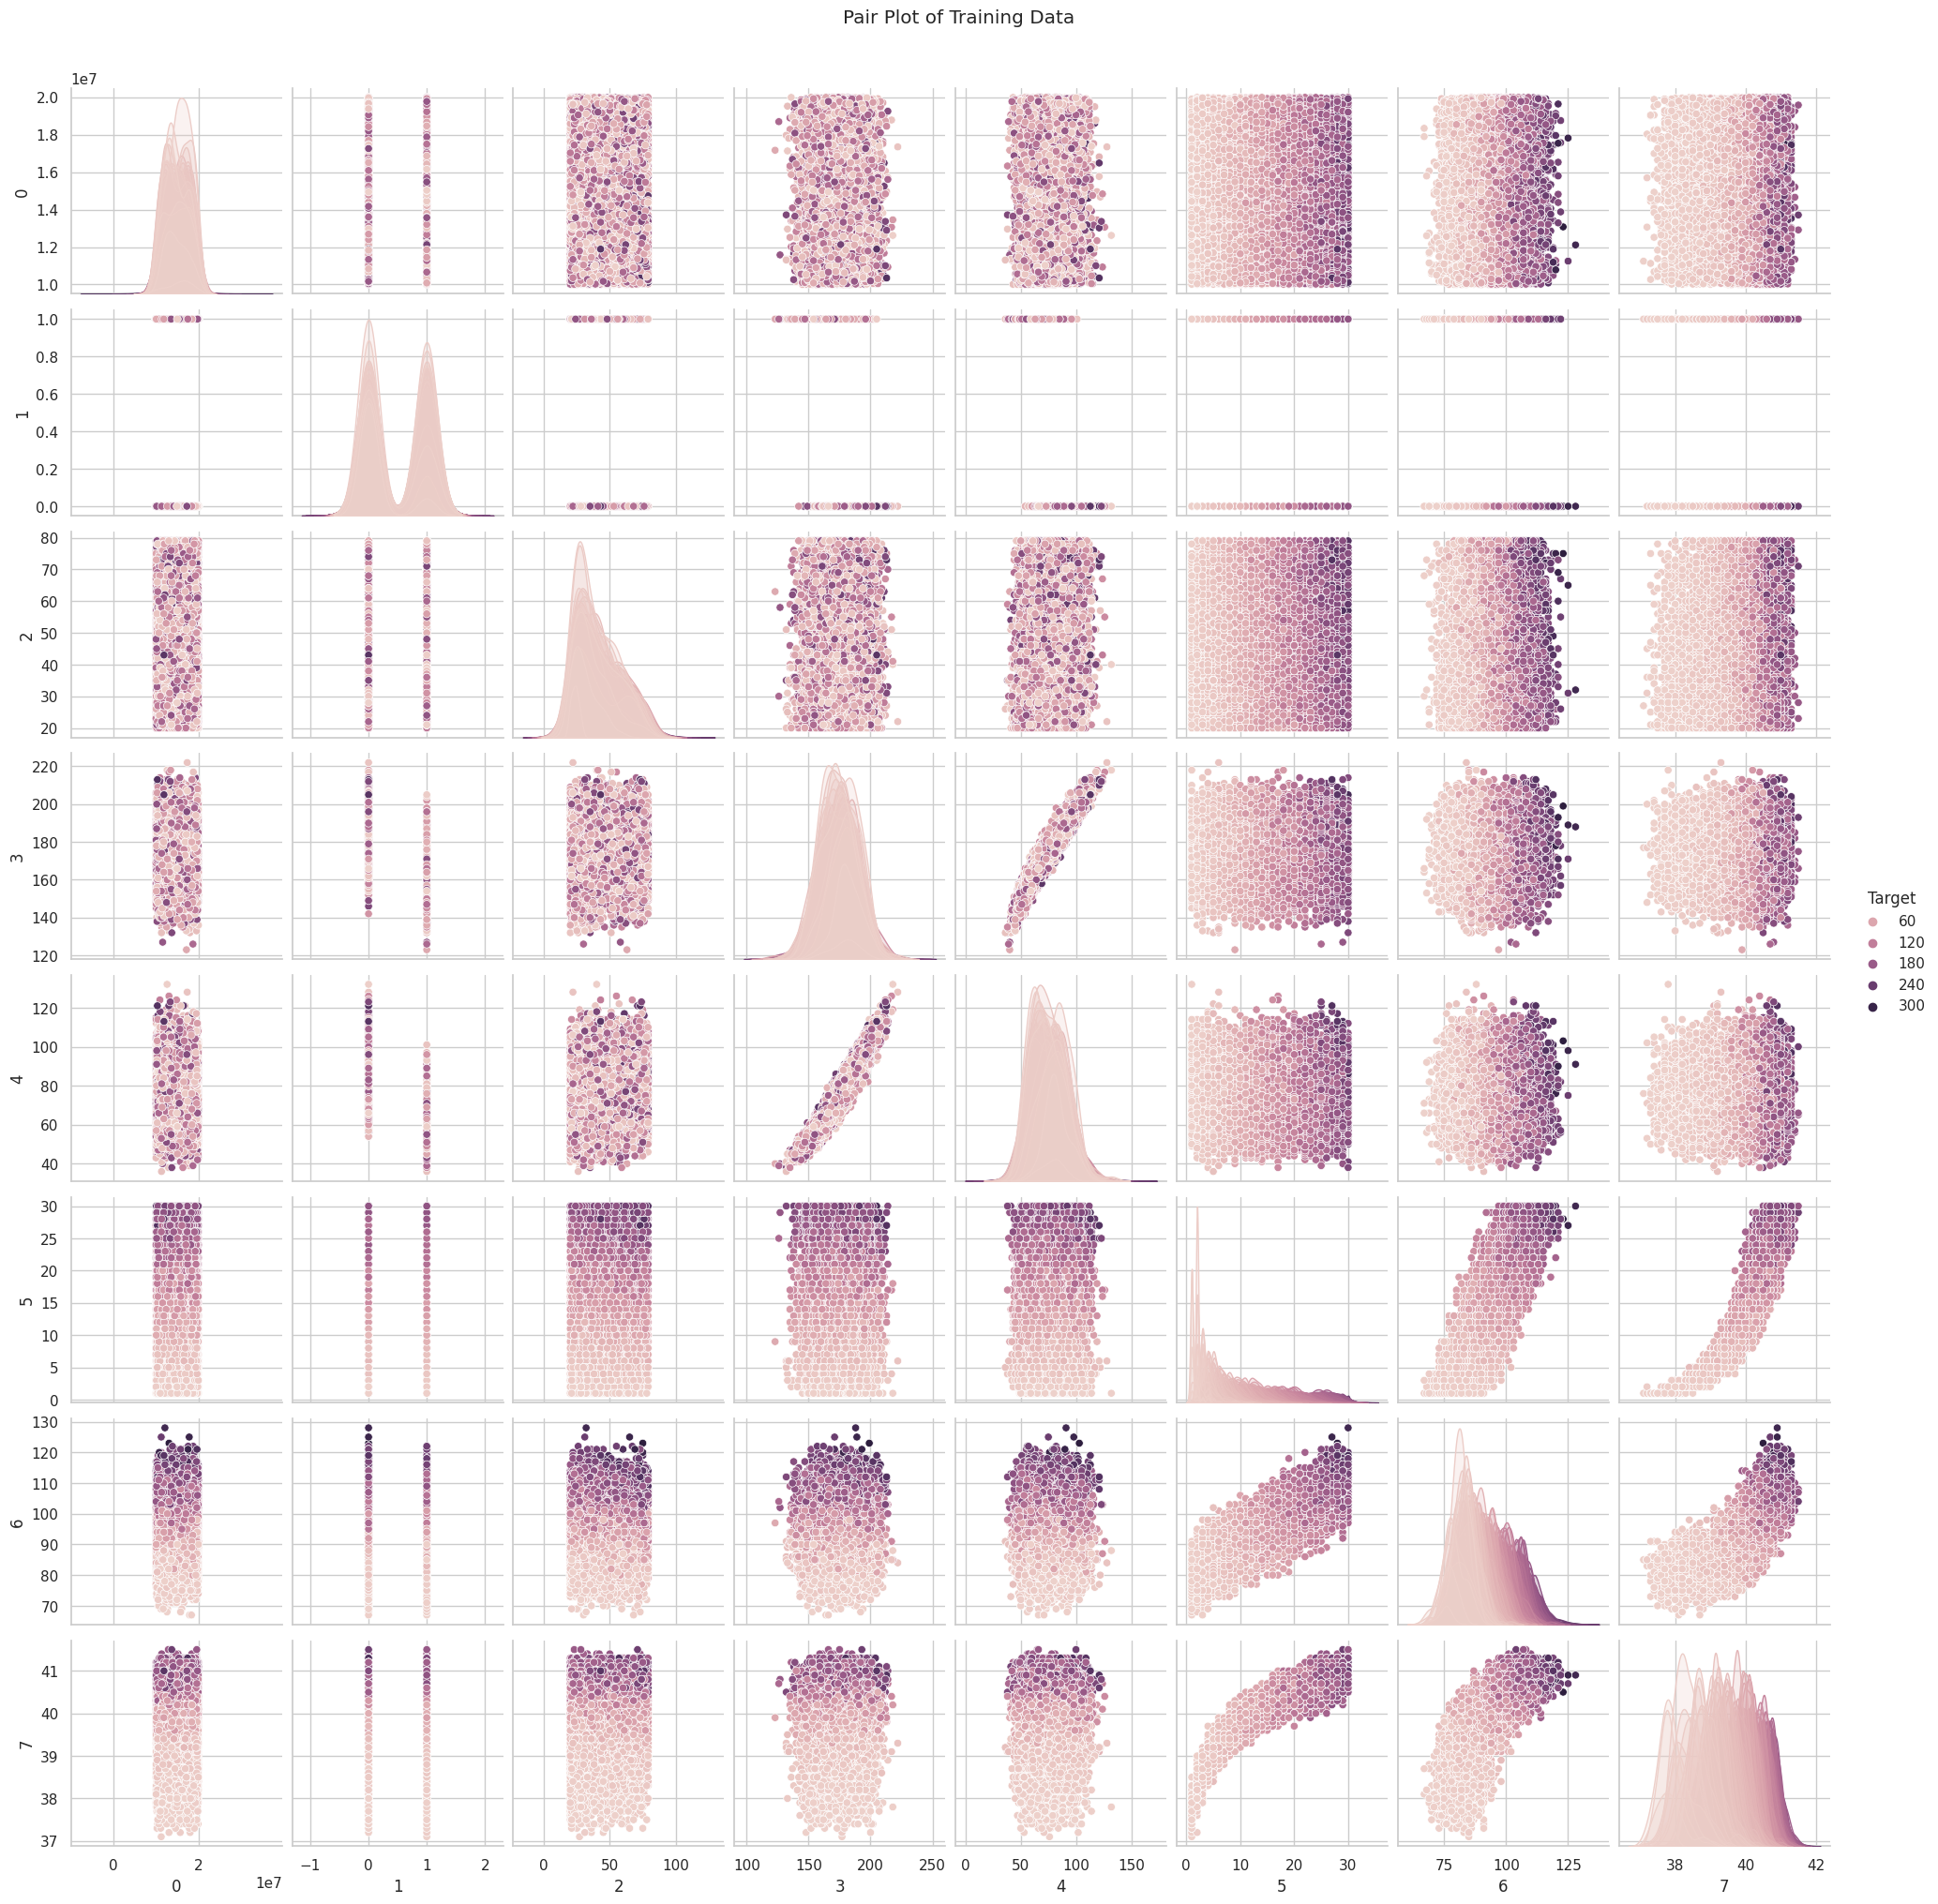

In [ ]:
# Assuming X_train, Y_train are defined
# Convert Y_train to a DataFrame
Y_train_df = pd.DataFrame({'Target': Y_train.flatten()})

# Combine X_train and Y_train into a single DataFrame
train_data = pd.concat([pd.DataFrame(X_train), Y_train_df], axis=1)

# Plot pair plot with titles and labels
sns.set(style="whitegrid")
sns.pairplot(train_data, hue='Target')
plt.suptitle('Pair Plot of Training Data', y=1.02)
plt.show()

array([[1.7958752e+07, 1.0000000e+00, 3.1000000e+01, ..., 7.0000000e+00,
        8.5000000e+01, 3.9300000e+01],
       [1.1204849e+07, 1.0000000e+00, 3.2000000e+01, ..., 6.0000000e+00,
        8.7000000e+01, 3.9300000e+01],
       [1.5563994e+07, 1.0000000e+00, 5.8000000e+01, ..., 2.6000000e+01,
        1.0700000e+02, 4.1000000e+01],
       ...,
       [1.7499944e+07, 1.0000000e+00, 3.6000000e+01, ..., 2.2000000e+01,
        1.0600000e+02, 4.0600000e+01],
       [1.1857300e+07, 1.0000000e+00, 5.6000000e+01, ..., 1.3000000e+01,
        9.4000000e+01, 3.9900000e+01],
       [1.4946022e+07, 0.0000000e+00, 2.8000000e+01, ..., 2.0000000e+00,
        7.2000000e+01, 3.8000000e+01]])